In [1]:
import pandas as pd
df = pd.DataFrame({'x': [1,2,3,4,5],
                   'y': [1.3,1.8,3.5,4,4.6]})
df

,x,y
0,1,1.3
1,2,1.8
2,3,3.5
3,4,4.0
4,5,4.6


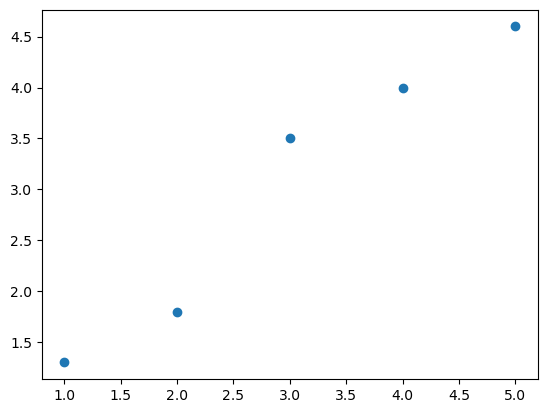

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(df['x'], df['y'])
plt.show()

In [4]:
#vamos supor uma reta y = x, que "passe" pelos pontos
df['y_reta'] = df['x']

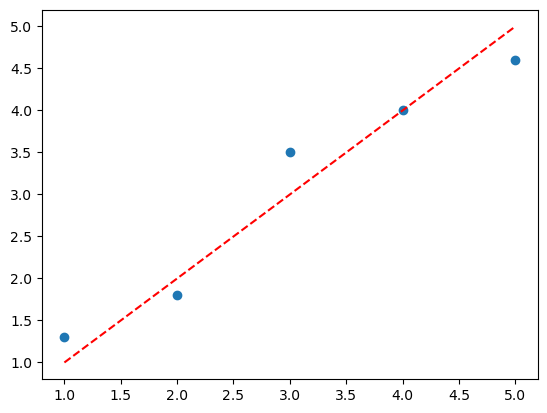

In [7]:
fig, ax = plt.subplots()

ax.scatter(df['x'], df['y'])
ax.plot(df['x'], df['y_reta'], '--r')
plt.show()

Se esta fosse a reta do modelo $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$, existem erros (resíduos) pois existem fatores não presentes no modelo que influenciam o fenômeno em análise. A equação na verdade é escrita como $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x + u$, sendo $u$ o erro que se comete ao estimar $y_i$ por meio da variável $x_i$ . Esse termo capta todos os fatores, além de X, responsáveis pela estimativa de $y$.

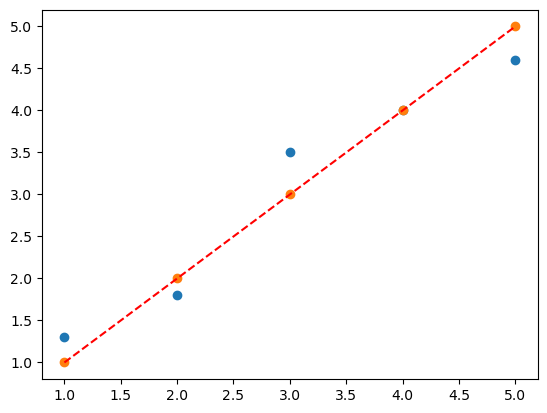

In [8]:
fig, ax = plt.subplots()

ax.scatter(df['x'], df['y'])
ax.plot(df['x'], df['y_reta'], '--r')
ax.scatter(df['x'], df['y_reta'])
plt.show()

Essa é a melhor previsão que podemos fazer para os dados? A resposta é NÃO. A melhor reta que "passa" por estes pontos é a que permite MINIMIZAR o erro quadrático entre cada ponto $y$ observado e cada ponto $y$ estimado = $\hat{y}$. Isto é feito pelo método dos mínimos quadrados, objeto de estudo em estatística. Vamos usar a regressão linear do scikit learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [10]:
from sklearn.linear_model import LinearRegression

#fit (treino do modelo, ou seja, obter os parâmetros do modelo que ajustam x à y)
#reg = LinearRegression().fit(df['x'], df['y']) #execute esta linha e dará ERRO, pois só há uma feature em X. 
                                               #o algoritmo exige que o array seja 2D. Este arranjo é corrigido com reshape

In [11]:
#o reshape deve ser feito apenas nos valores de x. Se tentar fazer no df['x'], como é uma Series, não é possível, logo
df['x'].values.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [19]:
#criando o regressor, ou seja, o modelo de regressão linear simples
modelo = LinearRegression().fit(df['x'].values.reshape(-1,1), df['y'])

In [20]:
modelo.intercept_

0.3999999999999999

In [17]:
#verificar coeficiente angular (intercepto - beta_1)
reg.coef_

array([0.88])

Em termos de produção, o modelo é $\hat{y} = 0.399 + 0.880x$. Dado um $x$, calcule e exiba a estimativa da variável target $y$.

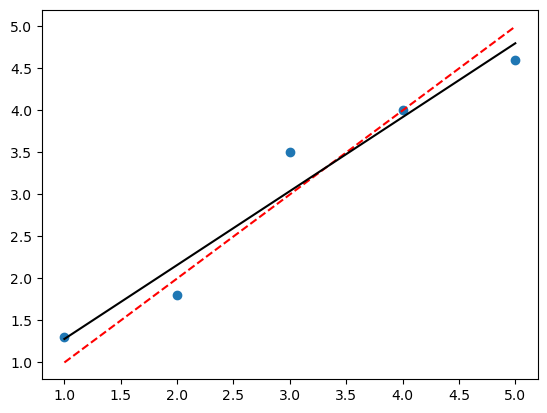

In [24]:
beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

y_hat = beta_0 + beta_1*df['x'].values #y predito

fig, ax = plt.subplots()

ax.scatter(df['x'], df['y'])
ax.plot(df['x'], df['y_reta'], '--r')
#ax.scatter(df['x'], df['y_reta'])
ax.plot(df['x'], y_hat, 'k')
plt.show()

In [25]:
#aplicando o modelo ao conjunto de dados x
df['y_pred'] = modelo.predict(df['x'].values.reshape(-1,1))

In [26]:
df

,x,y,y_reta,y_pred
0,1,1.3,1,1.28
1,2,1.8,2,2.16
2,3,3.5,3,3.04
3,4,4.0,4,3.92
4,5,4.6,5,4.80


In [30]:
#vamos comparar a soma dos erros quadráticos entre a reta inicial y_reta e a reta obtida por mínimos quadrados y_pred
modelo_1 = sum((df['y']-df['y_reta'])**2)
modelo_2 = sum((df['y']-df['y_pred'])**2)

print(f' modelo 1: {modelo_1}')
print(f' modelo 2: {modelo_2}')



 modelo 1: 0.5400000000000003
 modelo 2: 0.38800000000000046


In [31]:
df['modelo_1_erro'] = (df['y']-df['y_reta'])**2
df['modelo_2_erro'] = (df['y']-df['y_pred'])**2
df


,x,y,y_reta,y_pred,modelo_1_erro,modelo_2_erro
0,1,1.3,1,1.28,0.09,0.0004
1,2,1.8,2,2.16,0.04,0.1296
2,3,3.5,3,3.04,0.25,0.2116
3,4,4.0,4,3.92,0.00,0.0064
4,5,4.6,5,4.80,0.16,0.0400


In [32]:
df[['modelo_1_erro', 'modelo_2_erro']].sum()

modelo_1_erro    0.540
modelo_2_erro    0.388
dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(df['y'], df['y_reta']))
print(mean_squared_error(df['y'], df['y_reta']))
print('------------------------------')
print(mean_absolute_error(df['y'], df['y_pred']))
print(mean_squared_error(df['y'], df['y_pred']))

0.2800000000000001
0.10800000000000005
------------------------------
0.22400000000000028
0.07760000000000009
